# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

2.0


# 1. Data Repository

In [2]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,1000,10,N
1,france,Multivariate,Association Rule Mining,"InvoiceNo, Description",8557,8,N
2,germany,Multivariate,Association Rule Mining,"InvoiceNo, Description",9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,683,10,N
6,credit,Multivariate,Classification (Binary),default,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,10000,14,N
9,employee,Multivariate,Classification (Binary),left,14999,10,N


In [4]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. Initialize Setup

In [5]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=123, log_experiment=True, experiment_name='juice1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"CH: 0, MM: 1"
3,Original Data,"(1070, 19)"
4,Missing Values,False
5,Numeric Features,13
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


2020/07/31 01:41:16 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: No module named 'repository'


# 3. Compare Baseline

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8263,0.8959,0.7262,0.8139,0.7644,0.6280,0.6338,0.0420
1,Linear Discriminant Analysis,0.8263,0.8938,0.7536,0.7938,0.7713,0.6317,0.6342,0.0085
2,Ridge Classifier,0.8236,0.0000,0.7499,0.7920,0.7680,0.6262,0.6292,0.0134
3,Ada Boost Classifier,0.8075,0.8637,0.7053,0.7837,0.7398,0.5881,0.5924,0.0663
4,Gradient Boosting Classifier,0.8062,0.8869,0.7363,0.7651,0.7479,0.5909,0.5939,0.1177
5,CatBoost Classifier,0.8008,0.8884,0.7259,0.7614,0.7399,0.5790,0.5826,1.7187
6,Extreme Gradient Boosting,0.7968,0.8885,0.7294,0.7512,0.7374,0.5722,0.5752,0.0455
7,Light Gradient Boosting Machine,0.7861,0.8806,0.7053,0.7393,0.7195,0.5471,0.5497,0.0749
8,Quadratic Discriminant Analysis,0.7621,0.8240,0.6267,0.7397,0.6678,0.4863,0.5000,0.0100
9,Random Forest Classifier,0.7608,0.8397,0.6674,0.7124,0.6848,0.4928,0.4974,0.1165


# 4. Create Model

In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7867,0.8501,0.6552,0.7600,0.7037,0.5385,0.5421
1,0.8533,0.9355,0.7241,0.8750,0.7925,0.6806,0.6879
2,0.7600,0.8193,0.6552,0.7037,0.6786,0.4875,0.4883
3,0.8133,0.9168,0.7241,0.7778,0.7500,0.6014,0.6023
4,0.8133,0.8838,0.8621,0.7143,0.7813,0.6209,0.6293
5,0.8267,0.8966,0.6897,0.8333,0.7547,0.6225,0.6292
6,0.8267,0.9019,0.7000,0.8400,0.7636,0.6286,0.6351
7,0.8400,0.9348,0.7000,0.8750,0.7778,0.6552,0.6651
8,0.8243,0.8912,0.6552,0.8636,0.7451,0.6149,0.6286
9,0.9189,0.9287,0.8966,0.8966,0.8966,0.8299,0.8299


In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7067,0.7061,0.6552,0.6129,0.6333,0.3893,0.3899
1,0.7467,0.7234,0.5862,0.7083,0.6415,0.4483,0.4531
2,0.6933,0.6799,0.6207,0.6000,0.6102,0.3575,0.3577
3,0.7733,0.7976,0.7586,0.6875,0.7213,0.5311,0.5329
4,0.7867,0.7879,0.7931,0.6970,0.7419,0.5614,0.5648
5,0.7333,0.7185,0.6897,0.6452,0.6667,0.4449,0.4455
6,0.7333,0.7333,0.7333,0.6471,0.6875,0.4565,0.4592
7,0.8533,0.8481,0.8333,0.8065,0.8197,0.6961,0.6964
8,0.7568,0.7414,0.5862,0.7391,0.6538,0.4702,0.4777
9,0.8108,0.7831,0.6552,0.8261,0.7308,0.5879,0.5973


In [9]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7933,0.8653,0.6034,0.8140,0.6931,0.5424,0.5562
1,0.7733,0.8534,0.6949,0.7193,0.7069,0.5222,0.5224
2,0.7600,0.8167,0.6949,0.6949,0.6949,0.4971,0.4971
3,0.8456,0.8904,0.7931,0.8070,0.8000,0.6743,0.6744
4,0.7785,0.8459,0.6379,0.7551,0.6916,0.5207,0.5252
Mean,0.7902,0.8544,0.6849,0.7581,0.7173,0.5514,0.5551
SD,0.0297,0.0241,0.0644,0.0469,0.0417,0.0631,0.0625


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [11]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [12]:
ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8022,0.8790,0.7501,0.7464,0.7475,0.5850,0.5857,0.0349
1,Gradient Boosting Classifier,0.7955,0.8769,0.7365,0.7391,0.7370,0.5698,0.5707,0.0912
2,Ada Boost Classifier,0.7915,0.8612,0.7091,0.7454,0.7258,0.5579,0.5593,0.0733
3,Light Gradient Boosting Machine,0.7914,0.8706,0.7261,0.7368,0.7309,0.5607,0.5613,0.0564
4,CatBoost Classifier,0.7874,0.8805,0.7194,0.7329,0.7250,0.5520,0.5531,2.0134
5,Random Forest Classifier,0.7727,0.8348,0.6576,0.7342,0.6917,0.5131,0.5167,0.1183
6,Extra Trees Classifier,0.7660,0.8303,0.6849,0.7100,0.6954,0.5058,0.5078,0.1597


# 5. Tune Hyperparameters

In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7600,0.8328,0.7931,0.6571,0.7188,0.5126,0.5195
1,0.8800,0.9333,0.8621,0.8333,0.8475,0.7486,0.7489
2,0.7600,0.8081,0.7241,0.6774,0.7000,0.5004,0.5011
3,0.8267,0.9168,0.8621,0.7353,0.7937,0.6458,0.6519
4,0.8000,0.8823,0.8966,0.6842,0.7761,0.6012,0.6192
5,0.8267,0.8966,0.7586,0.7857,0.7719,0.6322,0.6325
6,0.8000,0.9033,0.8000,0.7273,0.7619,0.5902,0.5922
7,0.8667,0.9341,0.8667,0.8125,0.8387,0.7253,0.7264
8,0.8784,0.8935,0.7931,0.8846,0.8364,0.7400,0.7428
9,0.8649,0.9287,0.8966,0.7879,0.8387,0.7233,0.7277


In [14]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7467,0.8463,0.6552,0.6786,0.6667,0.4625,0.4627
1,0.8400,0.9262,0.6897,0.8696,0.7692,0.6493,0.6595
2,0.7733,0.7969,0.6552,0.7308,0.6909,0.5128,0.5147
3,0.8133,0.9160,0.7931,0.7419,0.7667,0.6114,0.6123
4,0.7733,0.8643,0.8276,0.6667,0.7385,0.5425,0.5524
5,0.7867,0.8523,0.6897,0.7407,0.7143,0.5444,0.5453
6,0.7733,0.8533,0.7000,0.7241,0.7119,0.5251,0.5253
7,0.8400,0.9081,0.8000,0.8000,0.8000,0.6667,0.6667
8,0.7703,0.8590,0.6207,0.7500,0.6792,0.5028,0.5082
9,0.9054,0.9184,0.8276,0.9231,0.8727,0.7978,0.8008


# 6. Ensemble Model

In [15]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7467,0.8223,0.6552,0.6786,0.6667,0.4625,0.4627
1,0.8533,0.9040,0.6897,0.9091,0.7843,0.6763,0.6912
2,0.7067,0.7864,0.5862,0.6296,0.6071,0.3736,0.3742
3,0.7867,0.8606,0.7586,0.7097,0.7333,0.5559,0.5567
4,0.7200,0.8531,0.6897,0.6250,0.6557,0.4207,0.4222
5,0.7200,0.8396,0.5517,0.6667,0.6038,0.3902,0.3944
6,0.8133,0.8604,0.7667,0.7667,0.7667,0.6111,0.6111
7,0.8133,0.8811,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7838,0.8383,0.6207,0.7826,0.6923,0.5290,0.5375
9,0.8649,0.8977,0.7586,0.8800,0.8148,0.7093,0.7142


In [16]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.7894,0.6552,0.7308,0.6909,0.5128,0.5147
1,0.8000,0.8482,0.6897,0.7692,0.7273,0.5701,0.5722
2,0.7067,0.7234,0.6552,0.6129,0.6333,0.3893,0.3899
3,0.8267,0.8516,0.7931,0.7667,0.7797,0.6369,0.6371
4,0.8000,0.8557,0.7931,0.7188,0.7541,0.5862,0.5883
5,0.7067,0.8362,0.6207,0.6207,0.6207,0.3816,0.3816
6,0.8000,0.8593,0.8000,0.7273,0.7619,0.5902,0.5922
7,0.8133,0.8733,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7838,0.8027,0.6897,0.7407,0.7143,0.5407,0.5416
9,0.8378,0.8636,0.7586,0.8148,0.7857,0.6555,0.6566


# 7. Blend Models

In [17]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7867,0.8366,0.6552,0.7600,0.7037,0.5385,0.5421
1,0.8400,0.9130,0.7241,0.8400,0.7778,0.6538,0.6582
2,0.7200,0.7834,0.6552,0.6333,0.6441,0.4134,0.4136
3,0.7867,0.8981,0.7586,0.7097,0.7333,0.5559,0.5567
4,0.8133,0.8756,0.8276,0.7273,0.7742,0.6162,0.6200
5,0.7067,0.8456,0.6207,0.6207,0.6207,0.3816,0.3816
6,0.8000,0.8722,0.7667,0.7419,0.7541,0.5856,0.5859
7,0.8267,0.8970,0.7333,0.8148,0.7719,0.6328,0.6351
8,0.7568,0.8659,0.6552,0.7037,0.6786,0.4833,0.4841
9,0.8919,0.9119,0.7931,0.9200,0.8519,0.7675,0.7727


# 8. Stack Models

In [18]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.8853,0.7241,0.8077,0.7636,0.6274,0.6298
1,0.8000,0.8954,0.6552,0.7917,0.7170,0.5645,0.5705
2,0.7867,0.8388,0.6897,0.7407,0.7143,0.5444,0.5453
3,0.8133,0.8932,0.7241,0.7778,0.7500,0.6014,0.6023
4,0.7600,0.8677,0.7586,0.6667,0.7097,0.5066,0.5097
5,0.8000,0.8752,0.7241,0.7500,0.7368,0.5756,0.5759
6,0.8000,0.8856,0.6667,0.8000,0.7273,0.5714,0.5774
7,0.8267,0.9174,0.7333,0.8148,0.7719,0.6328,0.6351
8,0.8108,0.8789,0.6552,0.8261,0.7308,0.5879,0.5973
9,0.8243,0.9027,0.6897,0.8333,0.7547,0.6198,0.6265


# 9. Analyze Model

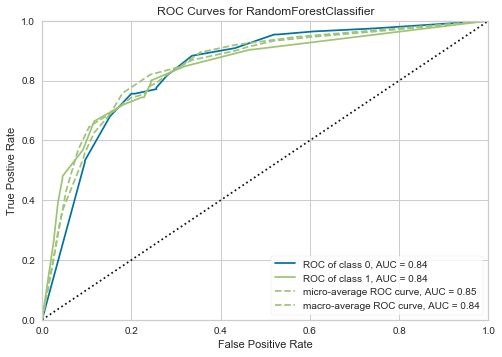

In [19]:
plot_model(rf)

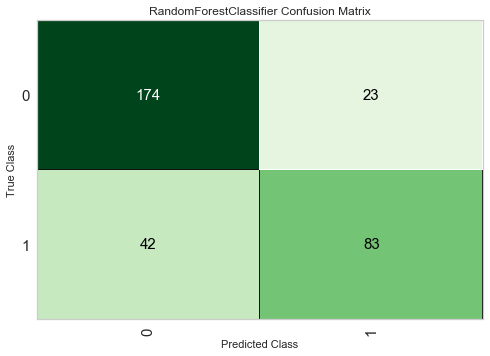

In [20]:
plot_model(rf, plot = 'confusion_matrix')

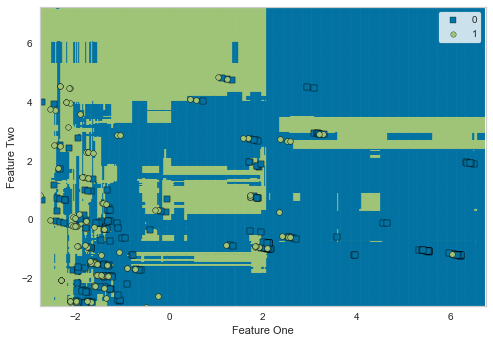

In [21]:
plot_model(rf, plot = 'boundary')

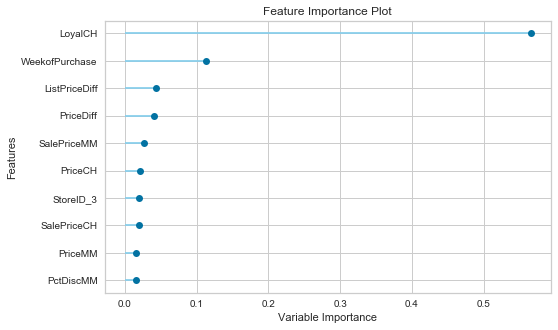

In [42]:
plot_model(rf, plot = 'feature')

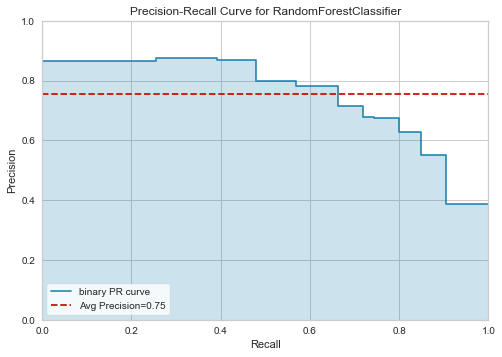

In [43]:
plot_model(rf, plot = 'pr')

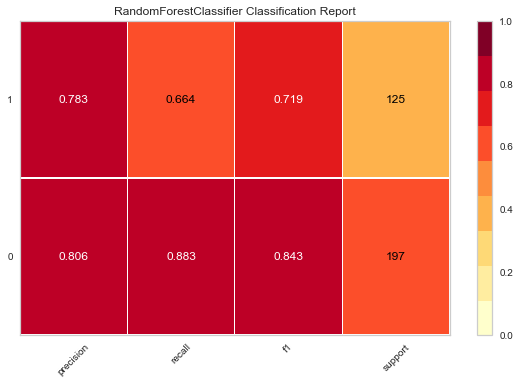

In [44]:
plot_model(rf, plot = 'class_report')

In [22]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

In [23]:
catboost = create_model('catboost', cross_validation=False)

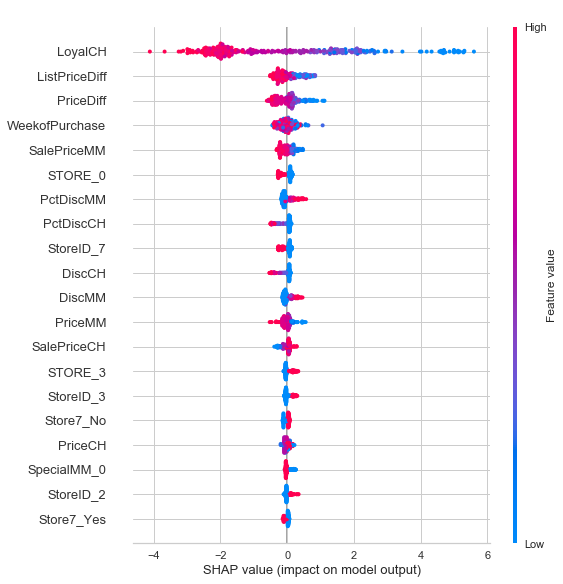

In [24]:
interpret_model(catboost)

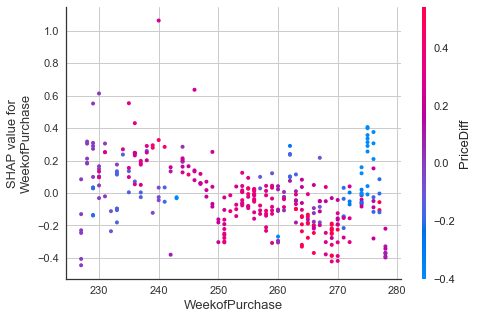

In [25]:
interpret_model(catboost, plot = 'correlation')

In [26]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. AutoML()

In [27]:
best = automl(optimize = 'Recall')
best

LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 12. Predict Model

In [28]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8416,0.9048,0.768,0.8136,0.7901,0.6631,0.6638


,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,...,Store7_No,Store7_Yes,STORE_0,STORE_1,STORE_2,STORE_3,STORE_4,Purchase,Label,Score
0,260.0,1.86,2.18,0.0,0.70,0.959305,1.48,1.86,-0.38,0.321101,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1873
1,229.0,1.69,1.69,0.0,0.00,0.795200,1.69,1.69,0.00,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1914
2,261.0,1.86,2.13,0.0,0.24,0.588965,1.89,1.86,0.03,0.112676,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.2532
3,247.0,1.99,2.23,0.0,0.00,0.003689,2.23,1.99,0.24,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9127
4,271.0,1.99,2.09,0.1,0.40,0.973612,1.69,1.89,-0.20,0.191388,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.1895


In [30]:
new_data = data.copy()
new_data.drop(['Purchase'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0,0.4742
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,1,0.5433
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0,0.1670
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,1,0.7475
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0,0.0492


# 13. Save / Load Model

In [31]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [32]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [33]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='Purchase')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [34]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [35]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [36]:
X_train = get_config('X_train')
X_train.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,...,SpecialCH_1,SpecialMM_0,SpecialMM_1,Store7_No,Store7_Yes,STORE_0,STORE_1,STORE_2,STORE_3,STORE_4
584,264.0,1.86,2.13,0.37,0.0,0.836160,2.13,1.49,0.64,0.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
751,232.0,1.79,2.09,0.00,0.0,0.400000,2.09,1.79,0.30,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
462,228.0,1.69,1.69,0.00,0.0,0.584000,1.69,1.69,0.00,0.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,234.0,1.75,1.99,0.00,0.4,0.977746,1.59,1.75,-0.16,0.201005,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
161,269.0,1.99,2.09,0.10,0.0,0.978010,2.09,1.89,0.20,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
get_config('seed')

123

In [38]:
from pycaret.classification import set_config
set_config('seed', 999)

In [39]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
# !mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org